In [ ]:
!pip install qiskit pylatexenc

In [2]:
import qiskit, pylatexenc

In [3]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def alice_sends(b2, b1):
  a = QuantumCircuit(2)
  a.h(0)
  a.cx(0, 1)
  a.barrier()
  if b2 == 1:
    a.x(0)
  if b1 == 1:
    a.z(0)
  a.barrier()
  a.cx(0, 1)
  a.h(0)
  return a

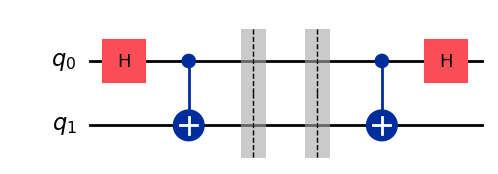

In [5]:
a = alice_sends(0, 0)
a.draw(output='mpl')

In [6]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_instruction(a)
sv.draw('latex')

<IPython.core.display.Latex object>

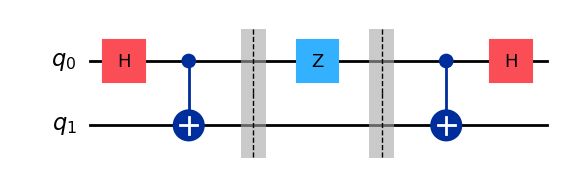

In [7]:
a = alice_sends(0, 1)
a.draw(output='mpl')

In [8]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_instruction(a)
sv.draw('latex')

<IPython.core.display.Latex object>

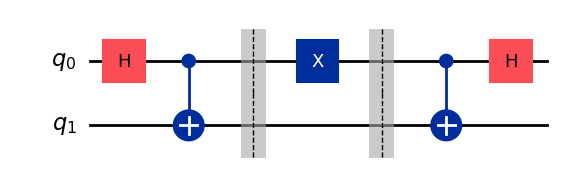

In [9]:
a = alice_sends(1, 0)
a.draw(output='mpl')

In [10]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_instruction(a)
sv.draw('latex')

<IPython.core.display.Latex object>

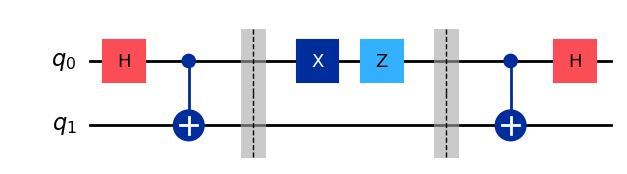

In [11]:
a = alice_sends(1, 1)
a.draw(output='mpl')

In [12]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_instruction(a)
sv.draw('latex')

<IPython.core.display.Latex object>

In [13]:
def all_in_one(b2, b1):
  a = QuantumCircuit(4, 2)
  if (b2 == 1):
    a.x(0)
  if (b1 == 1):
    a.x(1)
  if (b2 + b1 > 0):
    a.barrier()
  a.h(2)
  a.cx(2, 3)
  a.barrier()
  a.cx(0, 2)
  a.cz(1, 2)
  a.barrier()
  a.cx(2, 3)
  a.h(2)
  # a.measure(range(2, 4), range(2))
  return a

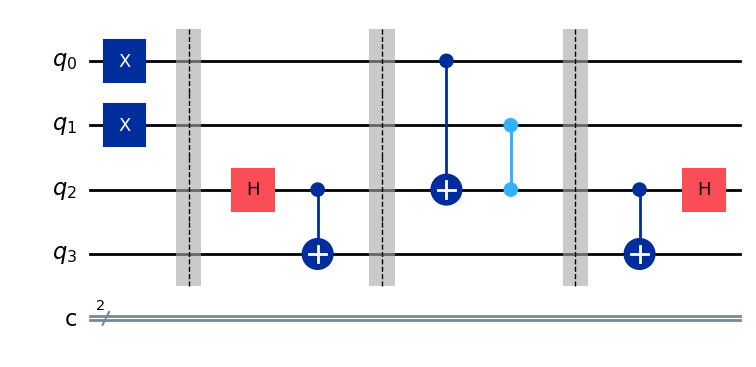

In [14]:
all_in_one(1, 1).draw(output='mpl')

In [15]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_instruction(all_in_one(1, 1))
sv.draw('latex')

<IPython.core.display.Latex object>

In [16]:
def all_in_one(b2, b1):
  a = QuantumCircuit(4, 2)
  if (b2 == 1):
    a.x(0)
  if (b1 == 1):
    a.x(1)
  if (b2 + b1 > 0):
    a.barrier()
  a.h(2)
  a.cx(2, 3)
  a.barrier()
  a.cx(0, 2)
  a.cz(1, 2)
  a.barrier()
  a.cx(2, 3)
  a.h(2)
  a.measure(range(2, 4), range(2))
  return a

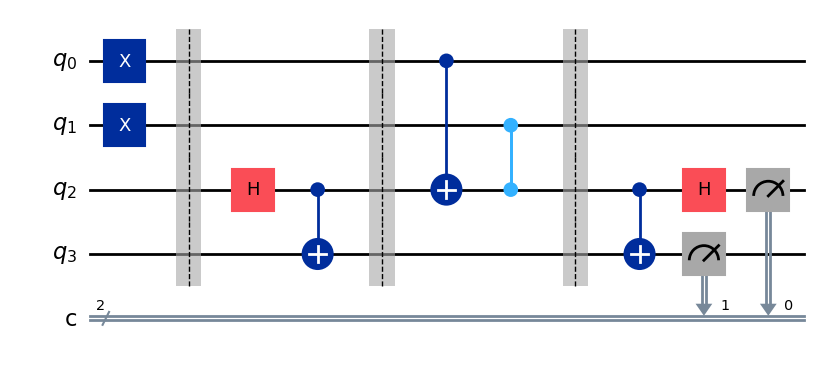

In [17]:
all_in_one(1, 1).draw(output='mpl')

In [ ]:
!pip install qiskit-aer

In [19]:
from qiskit_aer import AerSimulator
aersim = AerSimulator()

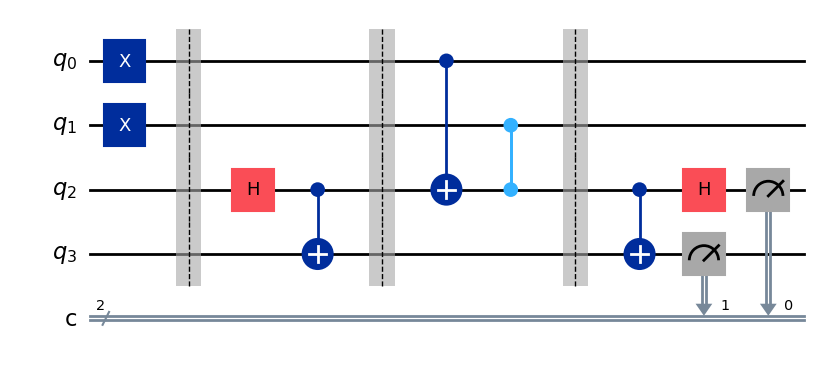

In [20]:
circuit = all_in_one(1, 1)
circuit.draw(output='mpl')

In [21]:
result = aersim.run(circuit).result()
counts = result.get_counts(circuit)
print(result.get_counts(circuit))

{'11': 1024}


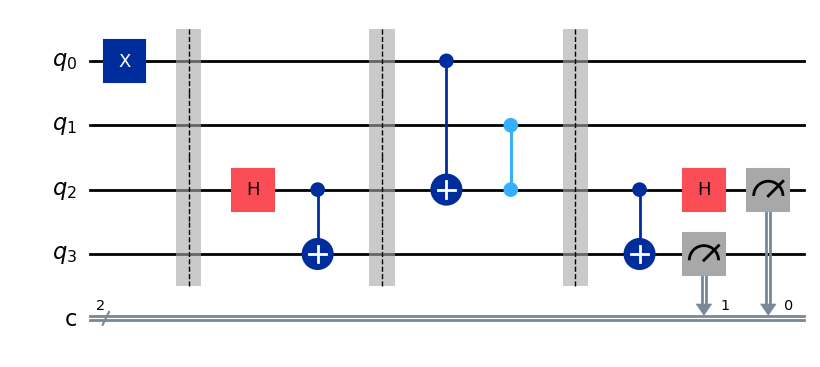

In [22]:
circuit = all_in_one(1, 0)
circuit.draw(output='mpl')

In [23]:
result = aersim.run(circuit).result()
counts = result.get_counts(circuit)
print(result.get_counts(circuit))

{'10': 1024}


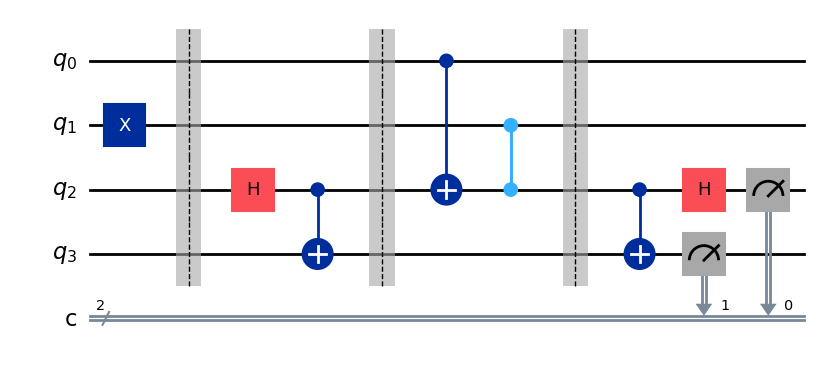

In [24]:
circuit = all_in_one(0, 1)
circuit.draw(output='mpl')

In [25]:
result = aersim.run(circuit).result()
counts = result.get_counts(circuit)
print(result.get_counts(circuit))

{'01': 1024}


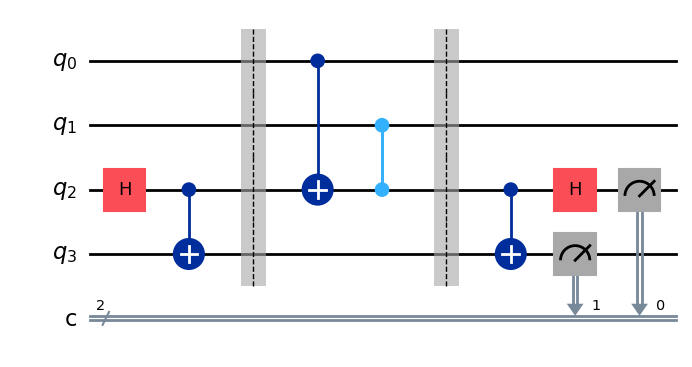

In [26]:
circuit = all_in_one(0, 0)
circuit.draw(output='mpl')

In [27]:
result = aersim.run(circuit).result()
counts = result.get_counts(circuit)
print(result.get_counts(circuit))

{'00': 1024}
